In [16]:
import pandas as pd
import numpy as np
import pandas as pd

In [17]:
df=pd.read_csv('titanic.csv')

In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
miss=[]
for i in df.columns:
    if df[i].isnull().values.any():
      print(f"Missing values exist in {i}")
      miss.append(i)

Missing values exist in Age
Missing values exist in Cabin
Missing values exist in Embarked


In [20]:
df['Age']=df['Age'].fillna(df['Age'].mean().round)
df=df.drop(columns=['Cabin'])
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [21]:
df=df.drop(columns=['Ticket','Name'])

In [22]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [23]:
df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2})

In [24]:
df['Sex']=df['Sex'].map({'male':0,'female':1})

In [25]:
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [28]:
for i in df.columns:
    if i=='PassengerId':
        continue
    df[i] = pd.to_numeric(df[i], errors='coerce')
    print(f"{i}")
    print(f"\t Mean - {df[i].mean()}")
    print(f"\t Median - {df[i].median()}")
    print(f"\t Mode - {df[i].mode()}")
    print(f"\t std - {df[i].std()}")

Survived
	 Mean - 0.3838383838383838
	 Median - 0.0
	 Mode - 0    0
Name: Survived, dtype: int64
	 std - 0.4865924542648585
Pclass
	 Mean - 2.308641975308642
	 Median - 3.0
	 Mode - 0    3
Name: Pclass, dtype: int64
	 std - 0.8360712409770513
Sex
	 Mean - 0.35241301907968575
	 Median - 0.0
	 Mode - 0    0
Name: Sex, dtype: int64
	 std - 0.47799007089609846
Age
	 Mean - 29.69911764705882
	 Median - 28.0
	 Mode - 0    24.0
Name: Age, dtype: float64
	 std - 14.526497332334044
SibSp
	 Mean - 0.5230078563411896
	 Median - 0.0
	 Mode - 0    0
Name: SibSp, dtype: int64
	 std - 1.1027434322934275
Parch
	 Mean - 0.38159371492704824
	 Median - 0.0
	 Mode - 0    0
Name: Parch, dtype: int64
	 std - 0.8060572211299559
Fare
	 Mean - 32.204207968574636
	 Median - 14.4542
	 Mode - 0    8.05
Name: Fare, dtype: float64
	 std - 49.693428597180905
Embarked
	 Mean - 0.3613916947250281
	 Median - 0.0
	 Mode - 0    0
Name: Embarked, dtype: int64
	 std - 0.6356734677794927


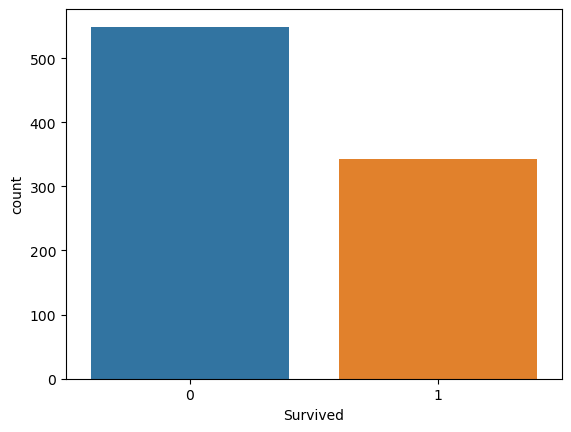

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.045702
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,0.116569
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,0.010171
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,0.116569,0.010171,-0.059961,-0.078665,0.062142,1.000000


In [29]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.countplot(x='Survived',data=df)
plt.show()
df.corr()

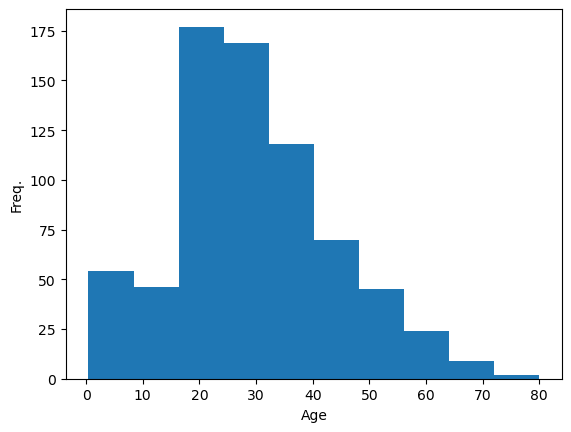

In [30]:
plt.hist(df['Age'])
plt.xlabel('Age')
_=plt.ylabel('Freq.')

In [31]:
df[['Survived','Sex']].groupby('Sex').mean()

,Survived
Sex,
0,0.188908
1,0.742038


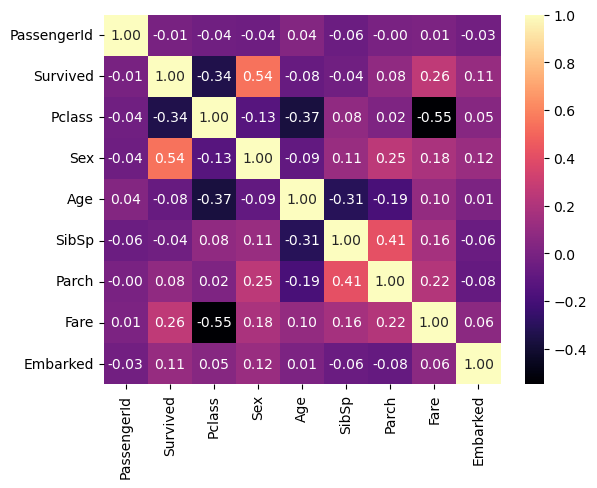

In [32]:
_=sns.heatmap(data=df.corr(),annot=True,cmap='magma',fmt='.2f')